<a href="https://colab.research.google.com/github/Sreraj/Machine-learning-Projects/blob/main/Chennai_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Read the csv file
df = pd.read_csv("/content/Chennai houseing sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [5]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
# Size of the data
df.shape

(7109, 22)

In [7]:
# Check null values

df.isna().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


In [8]:
null = ['N_BEDROOM','N_BATHROOM','QS_OVERALL']
for i in null:
  print(i,df[i].unique())

N_BEDROOM [ 1.  2.  3.  4. nan]
N_BATHROOM [ 1.  2. nan]
QS_OVERALL [4.33  3.765 3.09  4.01  3.29  3.32  2.67  3.26  3.55  3.16  3.83  2.89
 2.26  3.19  3.66    nan 3.57  4.3   3.35  4.76  3.39  3.43  3.73  3.59
 3.74  2.29  3.17  4.18  2.755 2.11  2.605 4.58  4.2   3.27  4.19  2.98
 3.12  3.08  3.85  3.42  3.2   4.    3.34  2.825 3.46  4.07  3.68  2.95
 3.505 2.97  3.63  3.76  3.77  2.78  3.985 3.04  2.88  4.21  2.42  3.8
 2.54  3.84  2.395 3.14  2.49  3.175 2.84  4.17  3.13  3.98  3.36  3.735
 2.62  4.61  2.6   4.09  3.18  3.425 3.71  3.21  3.61  2.9   3.94  4.145
 4.26  4.16  3.5   3.22  3.99  4.12  2.475 2.28  2.725 4.03  3.07  2.81
 3.45  3.9   3.87  3.1   2.93  3.05  3.54  2.63  3.11  3.89  3.33  3.96
 3.56  4.39  3.58  3.47  3.88  4.04  3.6   4.53  3.72  2.96  3.4   3.51
 4.215 3.055 3.06  3.53  3.435 3.41  3.86  3.62  4.5   4.42  4.14  3.01
 4.24  2.53  3.535 2.665 3.49  3.52  3.25  4.465 4.66  3.7   2.495 4.13
 4.37  2.66  2.3   2.85  3.31  3.03  3.97  2.75  3.355 3.75  2.775 

In [9]:
# fill the null values with the mean
for j in null:
  df[j]=df[j].fillna(df[i].mean())

In [10]:
# Check null values
df.isna().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,0
N_BATHROOM,0
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


In [19]:
# Let see  the unique values in the object columns

for col in df.columns:
  if df[col].dtype == 'object':
    print(col)
    print(df[col].unique())
    print('*'*100)

PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']
****************************************************************************************************
AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
****************************************************************************************************
SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Adjland'
 'PartiaLl']
****************************************************************************************************
PARK_FACIL
['Yes' 'No']
****************************************************************************************************
BUILDTYPE
['Commercial' 'Others' 'House']
****************************************************************************************************
UTILITY_AVAIL
['All Pub' 'ELO' 'NoSeWa']
****************************************************************************************************
STREET
['Paved' 'Gravel' 'No Access']
********

In [12]:
# Standardizing the data

# AREA

df['AREA'].replace(["Ana Nagar","Ann Nagar"],"Anna Nagar",inplace=True)
df['AREA'].replace("Karapakam","Karapakkam",inplace=True)
df['AREA'].replace(["Chormpet","Chrompt",'Chrmpet'],"Chrompet",inplace=True)
df['AREA'].replace("TNagar","T Nagar",inplace=True)
df['AREA'].replace("KKNagar","KK Nagar",inplace=True)
df['AREA'].replace("Velchery","Velachery",inplace=True)
df['AREA'].replace("Adyr","Adyar",inplace=True)

# SALE_COND

df['SALE_COND'].replace("Ab Normal",'AbNormal',inplace=True)
df['SALE_COND'].replace(["Partiall","Partiall"],"Partial",inplace=True)
df['SALE_COND'].replace("Adj Land","Adjland",inplace=True)

# PARK_FACIL

df['PARK_FACIL'].replace("Noo","No",inplace=True)

# BUILDTYPE

df['BUILDTYPE'].replace("Comercial","Commercial",inplace=True)
df['BUILDTYPE'].replace("Other","Others",inplace=True)

# UTILITY_AVAIL

df['UTILITY_AVAIL'].replace("AllPub","All Pub",inplace=True)
df['UTILITY_AVAIL'].replace("NoSewr ","NoSeWa",inplace=True)

# STREET

df['STREET'].replace("NoAccess","No Access",inplace=True)
df['STREET'].replace("Pavd","Paved",inplace=True)


In [13]:
# Change float  datatype to int

df['N_BEDROOM']=df['N_BEDROOM'].astype('int')
df['N_BATHROOM']=df['N_BATHROOM'].astype('int')
df['QS_ROOMS'] = df['QS_ROOMS'].astype('int')
df['QS_BATHROOM'] = df['QS_BATHROOM'].astype("int")
df['QS_BEDROOM'] = df['QS_BEDROOM'].astype("int")
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')


In [14]:
df["age"] = df["DATE_SALE"].dt.year - df["DATE_BUILD"].dt.year
df.drop(["DATE_SALE","DATE_BUILD"],axis=1,inplace=True)

In [15]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,age
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.637220,1.214517,3.688704,3.075538,3.069349,3.056126,3.503254,376938.330708,141005.726544,1.089491e+07,24.276270
std,457.410902,57.403110,0.803008,0.412226,1.019099,0.872937,0.876024,0.871499,0.525440,143070.662010,78768.093718,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.130000,272406.000000,84219.000000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.503254,349486.000000,127628.000000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.880000,451562.000000,184506.000000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,3.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,55.000000


In [16]:
df.select_dtypes(include='number').columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'age'],
      dtype='object')

<Axes: >

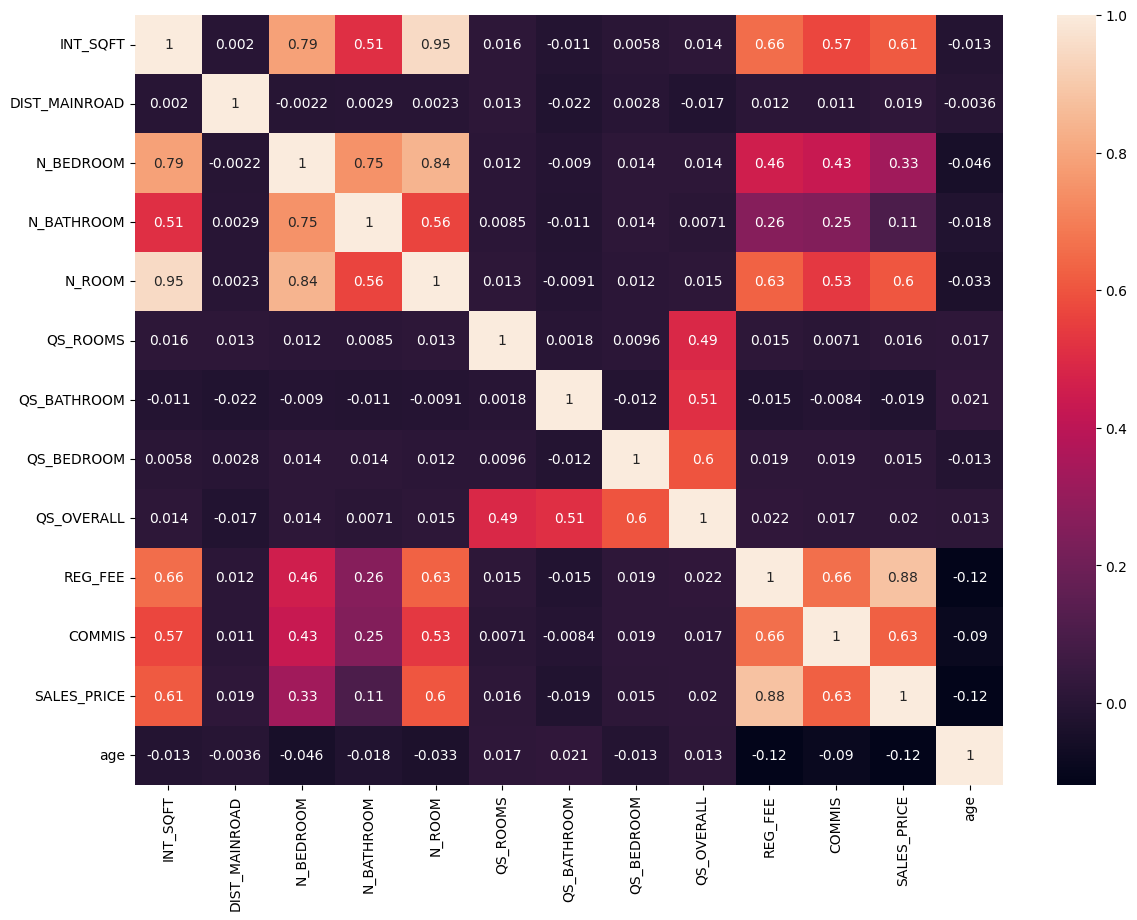

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot = True)

In [20]:
df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DIST_MAINROAD,int64
N_BEDROOM,int64
N_BATHROOM,int64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object
BUILDTYPE,object


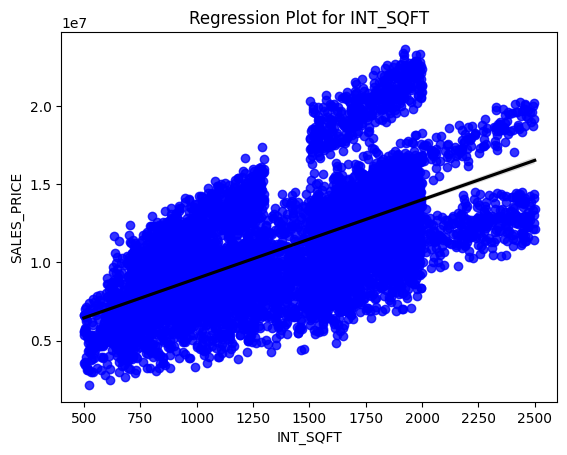

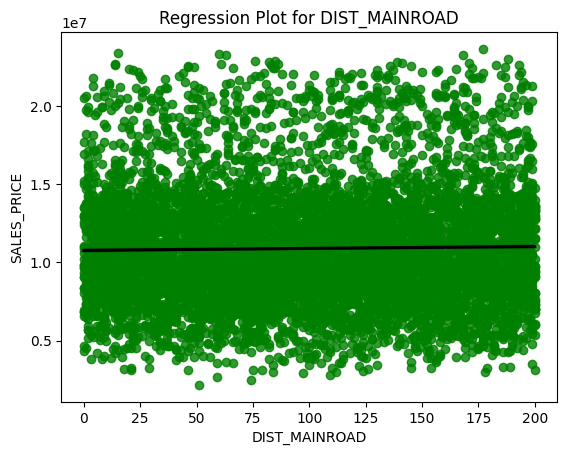

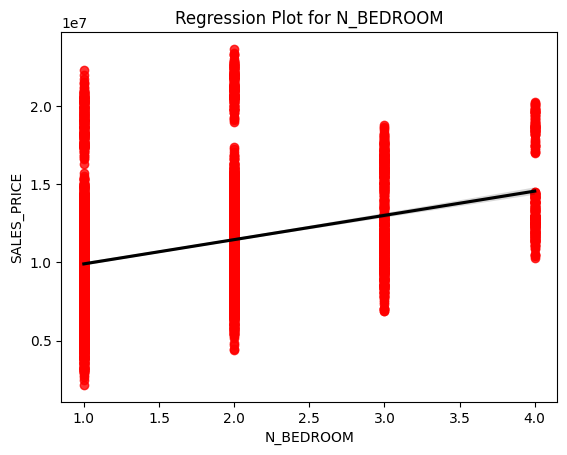

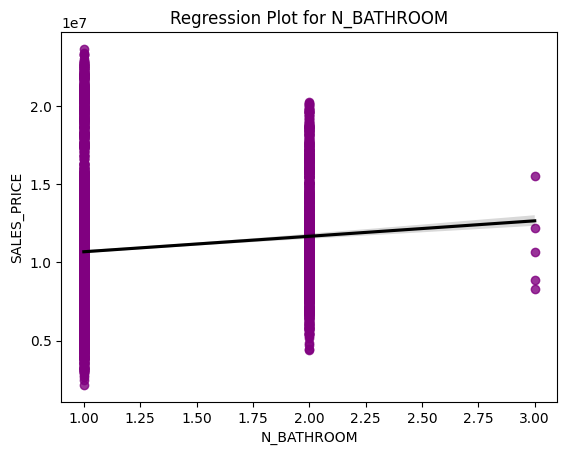

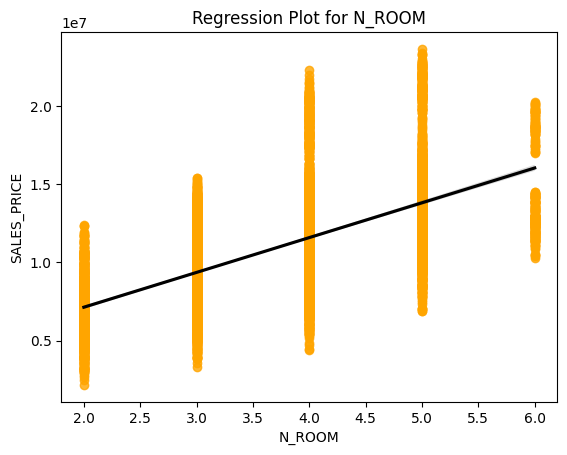

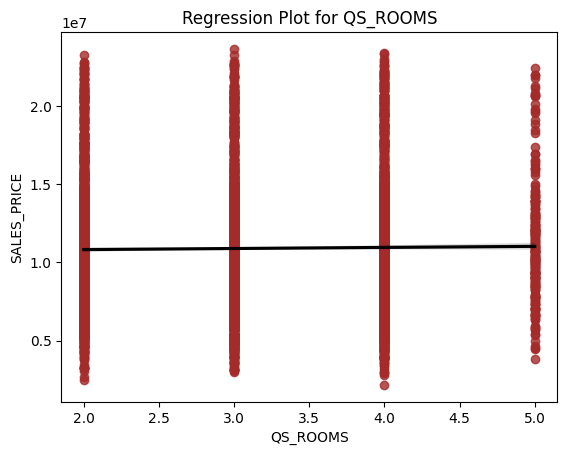

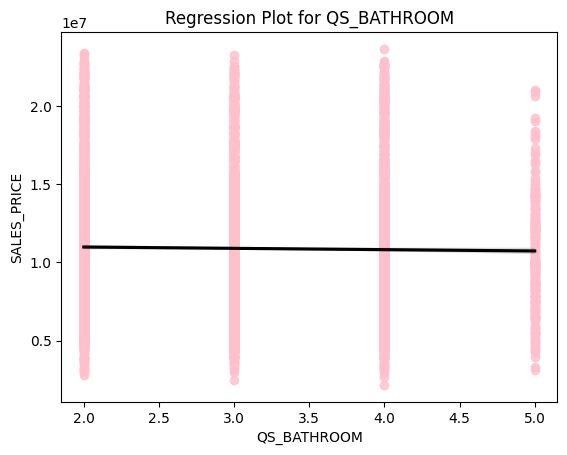

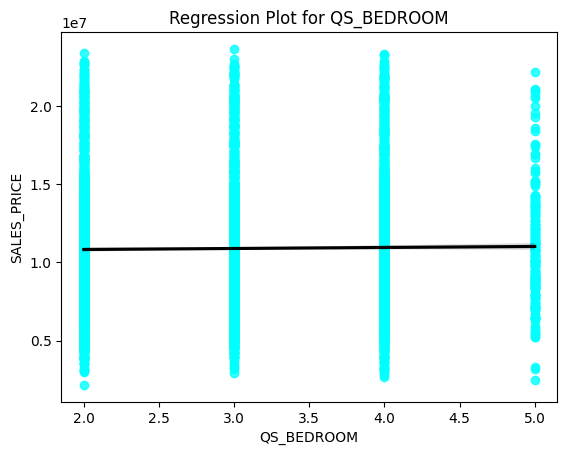

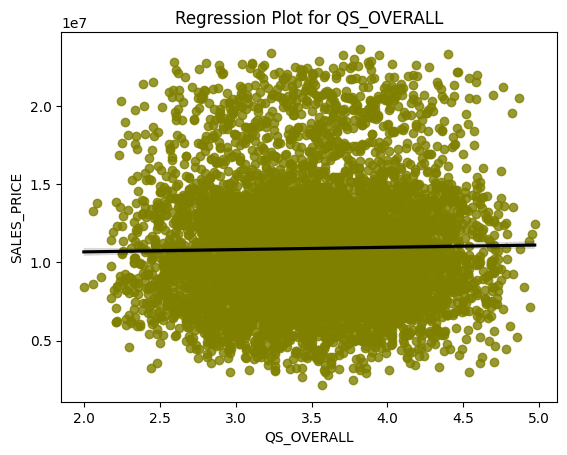

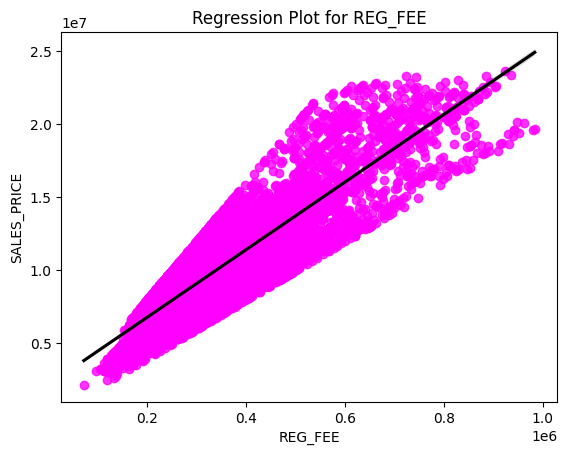

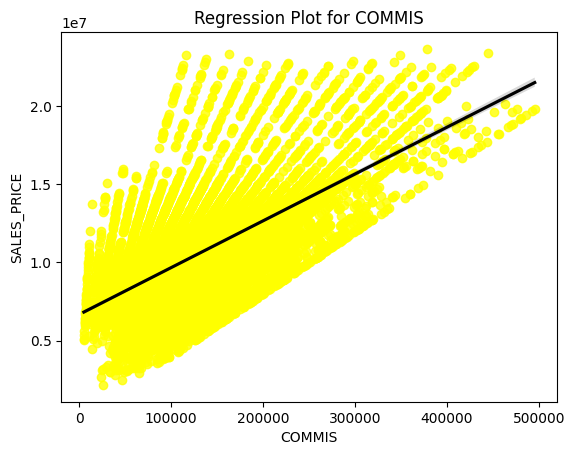

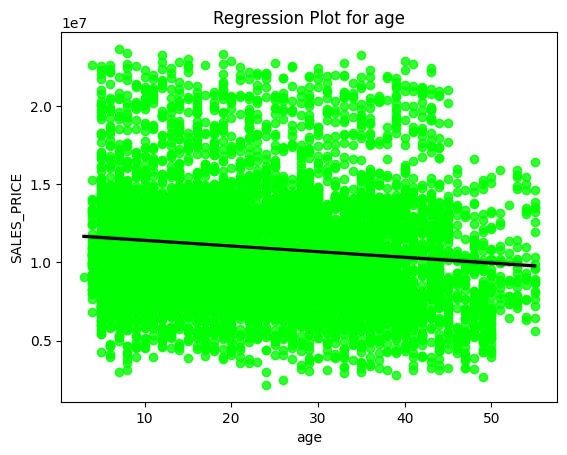

In [21]:
# Visualizing Numerical Features

# Define the columns and colors
columns = ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
           'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
           'REG_FEE', 'COMMIS', 'age']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan',
          'olive', 'magenta', 'yellow', 'lime', 'gray']

# Loop through columns and plot
for col, color in zip(columns, colors):
    sns.regplot( x=df[col], y=df['SALES_PRICE'], color=color, line_kws={'color': 'black'} )
    plt.title(f'Regression Plot for {col}')
    plt.show()


SALE_PRICE has a strong linear relationship with INT_SQFT(square feet).It shows that as square feet increases the sale price also increases.So this feature is necessary

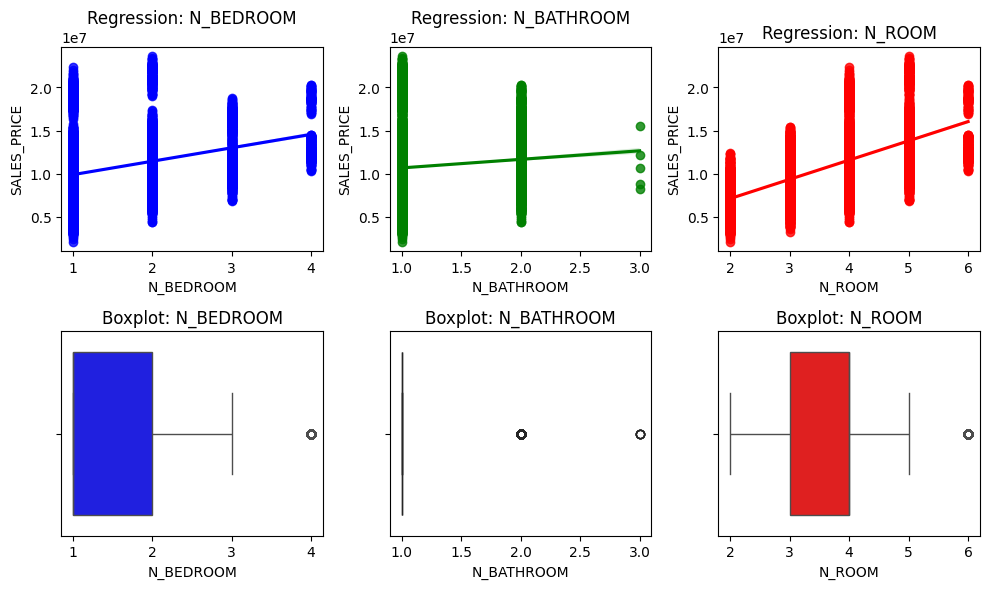

In [22]:
columns = ['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']
colors = ['blue', 'green', 'red']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, col in enumerate(columns):
    # Regression plot
    sns.regplot(x=df[col], y=df['SALES_PRICE'], color=colors[i], ax=axes[0, i])
    axes[0, i].set_title(f'Regression: {col}')

    # Boxplot
    sns.boxplot(x=df[col], color=colors[i], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

N_BEDROOM,N_BATHROOM,N_ROOM has a strong linear co_relation with sales_price.Hence these features will be critical in training the machine learning model

In [23]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['PARK_FACIL'] = encode.fit_transform(df['PARK_FACIL'])

In [24]:
df1 = pd.get_dummies(df[['SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','AREA']],dtype = int,drop_first = True)
df1

,SALE_COND_AdjLand,SALE_COND_Adjland,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_PartiaLl,SALE_COND_Partial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7105,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
7106,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
7107,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [25]:
new = pd.concat([df,df1],axis=1)
new

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,age,SALE_COND_AdjLand,SALE_COND_Adjland,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_PartiaLl,SALE_COND_Partial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,All Pub,Paved,A,4,3,4,4.330,380000,144400,7600000,44,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,All Pub,Gravel,RH,4,4,2,3.765,760122,304049,21717770,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,P01812,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4,3,2,3.090,421094,92114,13159200,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,P05346,Velachery,1855,14,3,2,5,Family,0,Others,NoSeWa,Paved,I,4,3,3,4.010,356321,77042,9630290,22,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,All Pub,Gravel,C,3,2,4,3.290,237000,74063,7406250,30,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1,1,2,AdjLand,0,Others,ELO,No Access,RM,3,2,2,2.520,208767,107060,5353000,49,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7105,P10000,Velachery,1897,52,3,2,5,Family,1,Others,NoSeWa,No Access,RH,3,4,3,3.920,346191,205551,10818480,9,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
7106,P09594,Velachery,1614,152,2,1,4,Normal Sale,0,House,NoSeWa,Gravel,I,4,4,2,3.840,317354,167028,8351410,28,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
7107,P06508,Karapakkam,787,40,1,1,2,Partial,1,Commercial,ELO,Paved,RL,4,3,4,4.160,425350,119098,8507000,32,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [26]:
new.drop(['SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','AREA','PRT_ID'],axis=1,inplace=True)
new

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,age,SALE_COND_AdjLand,SALE_COND_Adjland,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_PartiaLl,SALE_COND_Partial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,1004,131,1,1,3,1,4,3,4,4.330,380000,144400,7600000,44,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1986,26,2,1,5,0,4,4,2,3.765,760122,304049,21717770,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,909,70,1,1,3,1,4,3,2,3.090,421094,92114,13159200,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1855,14,3,2,5,0,4,3,3,4.010,356321,77042,9630290,22,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,1226,84,1,1,3,1,3,2,4,3.290,237000,74063,7406250,30,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,0,3,2,2,2.520,208767,107060,5353000,49,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7105,1897,52,3,2,5,1,3,4,3,3.920,346191,205551,10818480,9,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
7106,1614,152,2,1,4,0,4,4,2,3.840,317354,167028,8351410,28,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
7107,787,40,1,1,2,1,4,3,4,4.160,425350,119098,8507000,32,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [27]:
x = new.drop('SALES_PRICE',axis=1)
y = new['SALES_PRICE']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,age,SALE_COND_AdjLand,SALE_COND_Adjland,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_PartiaLl,SALE_COND_Partial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
4420,970,120,1,1,3,0,4,4,2,3.940,329175,34053,31,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
724,1014,83,1,1,3,1,3,2,2,2.720,266123,91767,35,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
765,766,152,1,1,2,0,3,2,3,3.060,194053,70995,44,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
6918,741,157,1,1,2,0,3,3,4,3.930,265839,70890,26,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5398,1351,192,2,1,4,1,4,3,3,3.820,417788,102126,19,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1733,148,2,1,4,0,2,4,4,4.180,709109,132958,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5191,1459,35,2,2,4,1,2,3,4,3.260,333648,207403,8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5226,1854,120,2,1,5,1,2,3,2,2.750,404223,236959,21,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
5390,1617,58,1,1,4,1,3,4,3,3.665,367007,211735,6,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([13781402.20905485,  7756543.91013524, 16946394.95293883, ...,
       13400735.08790725, 10401923.12782064,  7575025.57484118])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mae

504283.4428500472

In [33]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.049992669368882206

In [34]:
rmse = root_mean_squared_error(y_test,y_pred)
rmse

687470.1221076391

In [36]:
score = r2_score(y_test,y_pred)
score

0.965150256542207